# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data
training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# We store all the sign names in a list where in ith position is the name of the sign corresponding to the class i
sign_names=[]

with open('signnames.csv', mode='r') as f:
    next(f) # The first line contains the headers
    for line in csv.reader(f):
        sign_names.append(line[1])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

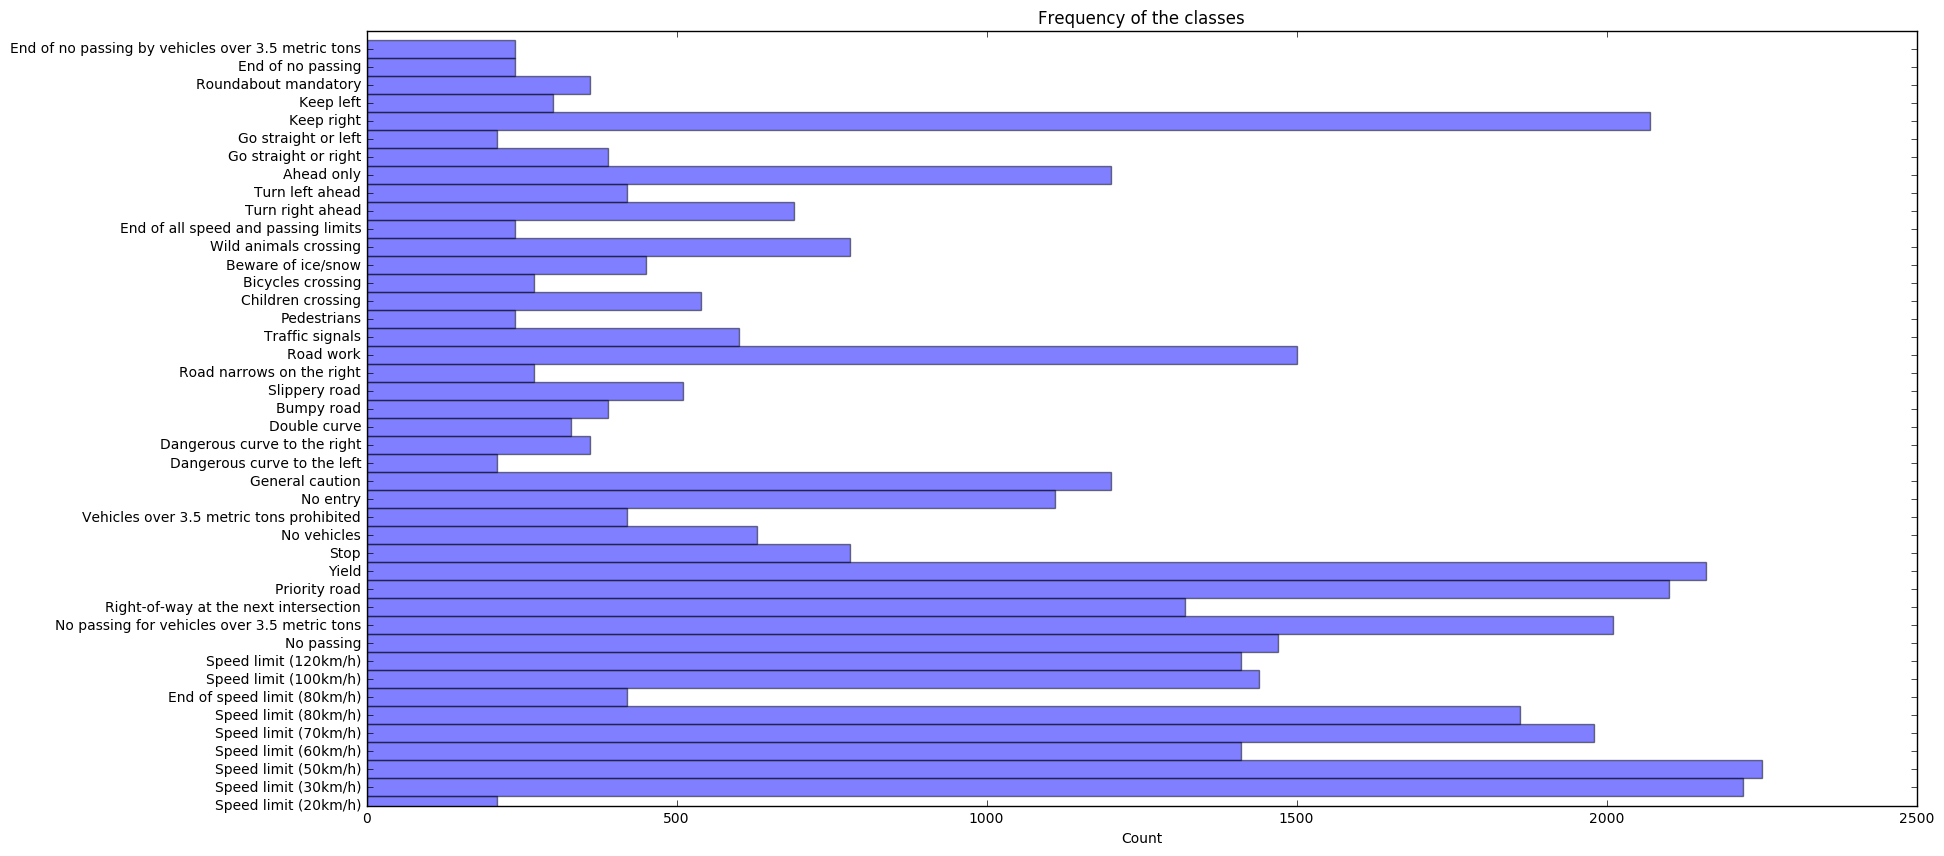

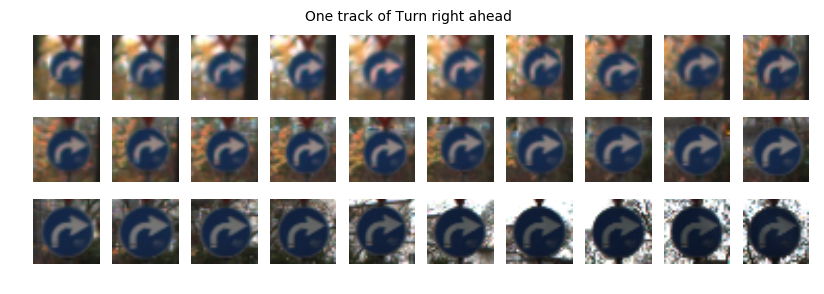

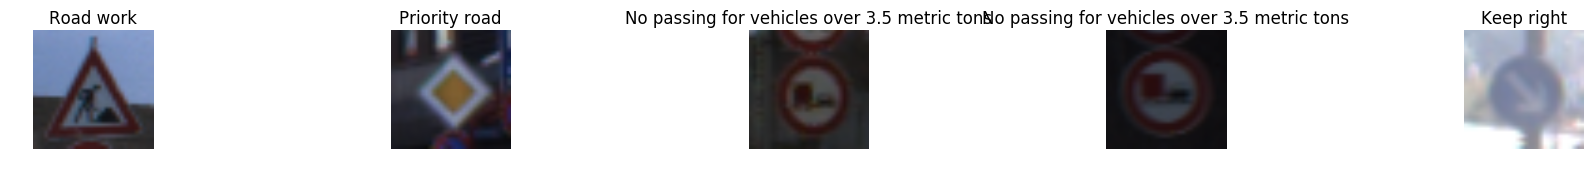

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# First, we show how many times each signs appear in the training set
def class_frequency(train_labels, sign_names):
    class_id = np.arange(len(sign_names))
    class_count = np.bincount(train_labels)
    plt.figure(figsize=(20,10))
    plt.barh(class_id, class_count, align='center', alpha=0.5, height=1)
    plt.yticks(class_id, sign_names)
    plt.ylim([0,len(sign_names)])
    plt.xlabel('Count')
    plt.title('Frequency of the classes')
    plt.show
    
# The images of the dataset are grouped by tracks of 30 images of each physical traffic sign.
# (Full description of the dataset at http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset)
# So, for each traffic sign in the real world, we have 30 images.
# Let's display an entire track : the 30 images of only one real world traffic sign
def display_track(images, labels, sign_names):
    nb_tracks = len(images)//30
    track = random.randint(0, nb_tracks-1)
    
    plt.figure(figsize=(10,3))
    for i in range(30):
        plt.subplot(3,10,i+1)
        plt.imshow(images[track*30+i])
        plt.axis('off')
        
    plt.suptitle('One track of ' + sign_names[labels[track*30]])
    plt.show
    
# Finally, let's display randomly images from the dataset
def display_images(images, labels, sign_names, nb_images=5):
    nb_rows = nb_images//5
    
    plt.figure(figsize=(20,10))
    plt.subplots_adjust(wspace=2)
    for i in range(nb_images):
        plt.subplot(nb_rows,5,i+1)
        index = random.randint(0,len(images)-1)
        plt.imshow(images[index])
        plt.axis('off')
        plt.title(sign_names[labels[index]])
        
    plt.show
    
class_frequency(y_train,sign_names)
display_track(X_train,y_train,sign_names)
display_images(X_train,y_train,sign_names)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

# We do a min max normalization
def min_max_normalization(image):
    a = 0.1
    b = 0.9
    data_max = np.max(image)
    data_min = np.min(image)
    return a + (b-a)*((image-data_min)/(data_max-data_min))

In [5]:
X_train_processed = [min_max_normalization(img) for img in X_train]
X_test_processed = [min_max_normalization(img) for img in X_test]

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

For the normalisation part, I used a classic min/max normalization.

For the colors, first I tried to change the color space of the data by converting RGB to YUV and GRAYSCALE. Unfortunately, results were better when the color space was not changed: I got a better validation accuracy on raw RGB data than on YUV data or GRAYSCALE data.

That is why I will keep the data in RGB for now and just normalize it via min/max normalization. But, in the convolutional neural network I am going to train, I added at the beginning 2 convolutional layers of sizes 1x1x8 and 1x1x3. These layers are 'layer0' and 'layer00'. Because of the 1x1 shape of these 2 layers, they will be train on single pixels and so will not take into account any pattern in the image (they won't detect lines, edges, ...). This means that training these layers is kind of training a new color space that will be more adapted than RGB.

So, I keep the data in RGB for now because I don't know any color space that gives better results, but I will train my model to find one. 


In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# First we translate the image by few pixels
def translate(image, pixel_range=2):
    nb_rows = image.shape[0]
    nb_cols = image.shape[1]
    pixels=[random.randint(-pixel_range,pixel_range),random.randint(-pixel_range,pixel_range)]
    translation_matrix = np.float32([[1,0,pixels[0]],[0,1,pixels[1]]])
    return cv2.warpAffine(image,translation_matrix,(nb_cols,nb_rows))

# Then we rotate the image by a small angle
def rotate(image, angle_range=15):
    nb_rows = image.shape[0]
    nb_cols = image.shape[1]
    center = (nb_cols/2,nb_rows/2)
    angle = random.uniform(-angle_range,angle_range)
    rotation_matrix = cv2.getRotationMatrix2D(center,angle,1)
    return cv2.warpAffine(image,rotation_matrix,(nb_cols,nb_rows))

# We can now create an enriched training set
def create_new_training_data(images, labels, multiplier=5, pixel_range=2, angle_range=15):
    images_new = []
    labels_new = []
    
    for i in range(len(images)):
        image = images[i]
        label = labels[i]
        images_new.append(image)
        labels_new.append(label)
        
        for j in range(multiplier):
            images_new.append(translate(rotate(image,angle_range),pixel_range))
            labels_new.append(label)
            
    return images_new, labels_new

In [7]:
multiplier = 5
X_train_enriched, y_train_enriched = create_new_training_data(X_train_processed, y_train, multiplier)

New number of training examples = 235254


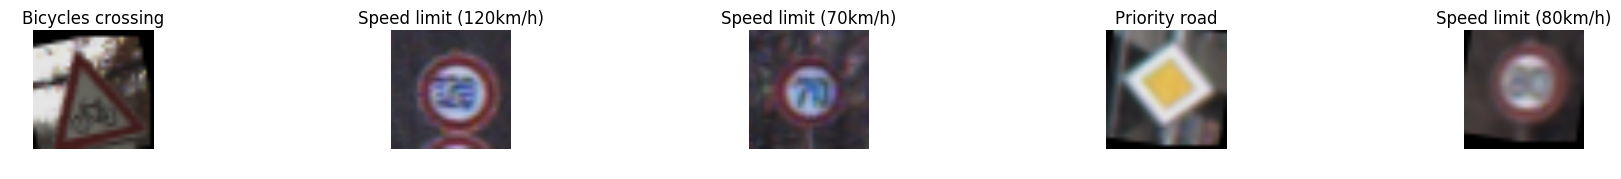

In [8]:
# Here is a basic summary of our enriched dataset
print("New number of training examples =", len(X_train_enriched))
display_images(X_train_enriched, y_train_enriched, sign_names)

In [9]:
# We are now going to split our enriched training dataset into a training set and a validation set
# The images of the dataset were extracted from 1-second video sequence.
# So, for each traffic sign in the real world, we have 30 images in the original dataset
# and (multiplier+1)*30 images in the enriched dataset.
# For the split to be valid, we do not want to have pictures of the same real world traffic sign
# in both the training set and the validation set (this is why we shuffle the sets only after the split).
# Moreover, we want each class to appear at least one time in the validation set.
# So we want at least n_classes*(multiplier+1)*30 images in the validation set.
from sklearn.utils import shuffle

def split_shuffle_dataset(images, labels, multiplier, proportion=0.1):
    nb_images = len(images)
    nb_real_world_signs = int(nb_images/(30*(multiplier+1)))
    nb_validation_tracks = int(proportion*nb_real_world_signs)
    validation_tracks = random.sample(range(nb_real_world_signs), nb_validation_tracks)
    labels_used = labels[:]
    
    validation_images = []
    validation_labels = []
    training_images = []
    training_labels = []
    
    for track in validation_tracks:
        start = track*30*(multiplier+1)
        end = start + 30*(multiplier+1)
        for i in range(start,end):
            validation_images.append(images[i])
            validation_labels.append(labels[i])
            labels_used[i] = n_classes+1
            
    missing_classes = [c for c in np.unique(labels) if c not in np.unique(validation_labels)]
    for c in missing_classes:
        start = labels.index(c)
        end = start + 30*(multiplier+1)
        for i in range(start,end):
            validation_images.append(images[i])
            validation_labels.append(labels[i])
            labels_used[i] = n_classes+1
        
    for i in range(nb_images):
        if labels_used[i] <= n_classes:
            training_images.append(images[i])
            training_labels.append(labels[i])
    
    validation_images, validation_labels = shuffle(validation_images, validation_labels)
    training_images, training_labels = shuffle(training_images, training_labels)
    
    return training_images, training_labels, validation_images, validation_labels


In [10]:
# Let's split and shuffle our enriched dataset into a training set and a validation set
training_images,training_labels,validation_images,validation_labels = \
    split_shuffle_dataset(X_train_enriched,y_train_enriched,multiplier)


Final number of training examples = 210954
Number of validation examples = 24300
Number of classes in the validation set = 43


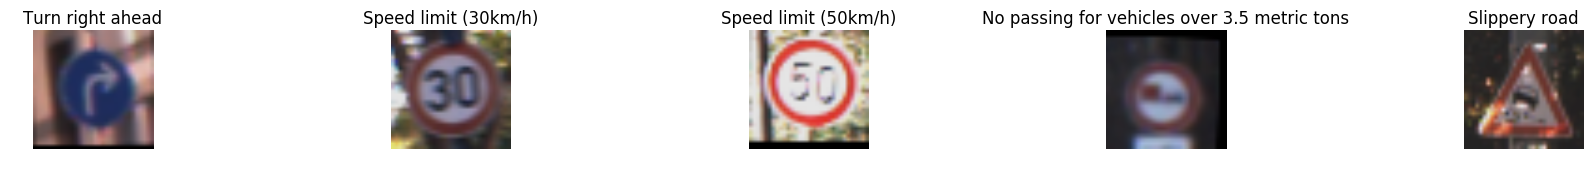

In [11]:
# Here is a basic summary of our final sets
print("Final number of training examples =", len(training_images))
print("Number of validation examples =", len(validation_images))
print("Number of classes in the validation set =", len(np.unique(validation_labels)))
display_images(training_images, training_labels, sign_names)

In [12]:
# Finally, we shuffle the test set
test_images, test_labels = shuffle(X_test_processed, y_test)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

As described in Yann LeCun's paper, I first created new data by randomly translating and rotating the images of the original training set (we obviously do not apply this to the test set). I do this because "ConvNets architectures have built-in invariance to small translations, scaling and rotations. When a dataset does not naturally contain those deformations, adding them synthetically will yield more robust learning to potential deformations in the test set".

This operation multiplies by 6 the number of images in the training dataset (39209*6=235254).
 
Then, I divide this enriched dataset into a training dataset and a validation dataset. The images of the dataset were extracted from 1-second video sequence. So, for each physical traffic sign in the real world, we have 30 images in the original dataset and 630=180 images in the enriched dataset. For the split to be valid, I do not want to have pictures of the same real world traffic sign in both the training set and the validation set (this is why I shuffle the sets only after the split). 
Moreover, I make sure that each class appears at least one time in the validation set.
 
I choose a validation set of about 15% of the enriched set. To make sure to have every class in the validation set and to not have the same real world traffic sign in both the training set and validation set, I add the images to the validation set track by track: each track is composed of 6*30 consecutive images of the same physical traffic sign in the real world.
 
Finally, we shuffle the training, validation and test sets.

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

epochs = 30
batch_size = 128
keep_proba = 0.5

def LeNet(x):    
    mu = 0
    sigma = 0.1
    weights = {
                'layer0':tf.Variable(tf.truncated_normal([1,1,3,8],mu,sigma)),
                'layer00':tf.Variable(tf.truncated_normal([1,1,8,3],mu,sigma)),
                'layer1':tf.Variable(tf.truncated_normal([3,3,3,6],mu,sigma)),
                'layer2':tf.Variable(tf.truncated_normal([5,5,6,16],mu,sigma)),
                'layer3':tf.Variable(tf.truncated_normal([400,1024])),
                'layer4':tf.Variable(tf.truncated_normal([1024,1024])),
                'layer5':tf.Variable(tf.truncated_normal([1024,n_classes]))}
    biases = {
                'layer0':tf.Variable(tf.zeros(8)),
                'layer00':tf.Variable(tf.zeros(3)),
                'layer1':tf.Variable(tf.zeros(6)),
                'layer2':tf.Variable(tf.zeros(16)),
                'layer3':tf.Variable(tf.zeros(1024)),
                'layer4':tf.Variable(tf.zeros(1024)),
                'layer5':tf.Variable(tf.zeros(n_classes))}
    
    # Layer 0: Convolutional. Input = 32x32x3. Output = 32x32x8.
    conv0 = tf.nn.conv2d(x,weights['layer0'],strides=[1,1,1,1],padding='VALID')
    conv0 = tf.nn.bias_add(conv0,biases['layer0'])
    # Activation.
    conv0 = tf.nn.elu(conv0)
    # Layer 00: Convolutional. Input = 32x32x8. Output = 32x32x3.
    conv00 = tf.nn.conv2d(conv0,weights['layer00'],strides=[1,1,1,1],padding='VALID')
    conv00 = tf.nn.bias_add(conv00,biases['layer00'])
    # Activation.
    conv00 = tf.nn.elu(conv00)
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = tf.nn.conv2d(conv00,weights['layer1'],strides=[1,1,1,1],padding='VALID')
    conv1 = tf.nn.bias_add(conv1,biases['layer1'])
    # Activation.
    conv1 = tf.nn.elu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1,weights['layer2'],strides=[1,1,1,1],padding='VALID')
    conv2 = tf.nn.bias_add(conv2,biases['layer2'])
    # Activation.
    conv2 = tf.nn.elu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    # Flatten. Input = 5x5x16. Output = 400.
    conv2 = flatten(conv2)
    # Layer 3: Fully Connected. Input = 400. Output = 1024.
    fc3 = tf.add(tf.matmul(conv2,weights['layer3']),biases['layer3'])
    # Activation.
    fc3 = tf.nn.elu(fc3)
    # Dropout.
    fc3 = tf.nn.dropout(fc3,keep_proba)
    # Layer 4: Fully Connected. Input = 1024. Output = 1024.
    fc4 = tf.add(tf.matmul(fc3,weights['layer4']),biases['layer4'])
    # Activation.
    fc4 = tf.nn.elu(fc4)
    # Dropout.
    fc4 = tf.nn.dropout(fc4,keep_proba)
    # Layer 5: Fully Connected. Input = 1024. Output = 43.
    logits = tf.add(tf.matmul(fc4,weights['layer5']),biases['layer5'])
    return logits, weights

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I started with the classic LeNet architecture, the one I wrote for the LeNet Lab.

Then, I added at the beginning, two convolutional layers of sizes 1x1x8 and 1x1x3. These layers are 'layer0' and 'layer00'. Because of the 1x1 shape of these 2 layers, they will be trained on single pixels and so they will not take into account any pattern in the image (they won't detect lines, edges, ...). This means that training these layers is kind of training a new color space that will be more adapted than RGB.

Then, I changed the sizes of the fully connected layers, changed the activation functions to elu and added dropouts.

So my final architecture is:
1. layer0:  convolutionnal layer with 1x1 kernel, depth of 8, stride of 1, valid padding, elu activation
2. layer00: convolutionnal layer with 1x1 kernel, depth of 3, stride of 1, valid padding, elu activation
3. layer1:  convolutionnal layer with 3x3 kernel, depth of 6, stride of 1, valid padding, elu activation
4. A max pooling layer with 2x2 kernel, stride of 2, valid padding
5. layer2:  convolutionnal layer with 5x5 kernel, depth of 16, stride of 1, valid padding, elu activation
6. A max pooling layer with 2x2 kernel, stride of 2, valid padding
7. A flattening layer
8. layer3: fully connected layer of size 1024, elu activation
9. A dropout layer with 50% dropout probability
10. layer4: fully connected layer of size 1024, elu activation
11. A dropout layer with 50% dropout probability
12. layer5: fully connected layer of size 43

So, the size of the data passed is:
1. 32x32x3 --> layer0 --> 32x32x8
2. 32x32x8 --> layer00 --> 32x32x3
3. 32x32x3 --> layer1 --> 28x28x6
4. 28x28x6 --> max pooling -->14x14x6
5. 14x14x6 --> layer2 --> 10x10x16
6. 10x10x16 --> max pooling --> 5x5x16
7. 5x5x16 --> flattening --> 400
8. 400 --> layer3 --> 1024
9. 1024 --> dropout --> 1024
10. 1024 --> layer4 --> 1024
11. 1024 --> dropout --> 1024
12. 1024 --> layer5 --> 43

In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, None)
one_hot_y = tf.one_hot(y, n_classes)

In [15]:
# Regularization function
def regularizer(weights, r):
    return r*sum([tf.nn.l2_loss(w) for w in weights.values()])

In [16]:
# Training pipeline
rate = tf.placeholder(tf.float32, None)
regularization_param = 0.00001

logits, weights = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + regularizer(weights, regularization_param)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [17]:
# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [18]:
# Finally let's train our model, display validation accuracy for each epoch and test it on the test set
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    nb_examples = len(training_images)
    
    print("Training...")
    print()
    for i in range(epochs):
        training_images, training_labels = shuffle(training_images, training_labels)
        epoch_rate = 0.002*(1-i/epochs)
        for offset in range(0, nb_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = np.array(training_images[offset:end]), np.array(training_labels[offset:end])
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, rate:epoch_rate})
        
        validation_accuracy = evaluate(validation_images, validation_labels)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    test_accuracy = evaluate(test_images, test_labels)
    print()
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()
    saver.save(sess, 'lenet')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.395

EPOCH 2 ...
Validation Accuracy = 0.608

EPOCH 3 ...
Validation Accuracy = 0.663

EPOCH 4 ...
Validation Accuracy = 0.730

EPOCH 5 ...
Validation Accuracy = 0.739

EPOCH 6 ...
Validation Accuracy = 0.795

EPOCH 7 ...
Validation Accuracy = 0.805

EPOCH 8 ...
Validation Accuracy = 0.824

EPOCH 9 ...
Validation Accuracy = 0.818

EPOCH 10 ...
Validation Accuracy = 0.850

EPOCH 11 ...
Validation Accuracy = 0.848

EPOCH 12 ...
Validation Accuracy = 0.859

EPOCH 13 ...
Validation Accuracy = 0.868

EPOCH 14 ...
Validation Accuracy = 0.857

EPOCH 15 ...
Validation Accuracy = 0.879

EPOCH 16 ...
Validation Accuracy = 0.868

EPOCH 17 ...
Validation Accuracy = 0.881

EPOCH 18 ...
Validation Accuracy = 0.884

EPOCH 19 ...
Validation Accuracy = 0.887

EPOCH 20 ...
Validation Accuracy = 0.891

EPOCH 21 ...
Validation Accuracy = 0.897

EPOCH 22 ...
Validation Accuracy = 0.895

EPOCH 23 ...
Validation Accuracy = 0.904

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

To train my model, I used the AdamOptimizer, like in the LeNet Lab:

I used 30 epochs and a batch size of 128.

For the dropout probability, I kept the classic 50%.

For the regularization parameter, I tried multiple values (1e-6, 1e-5, 1e-4, 1e-3) and kept the best one: 1e-5.

For the learning rate, I did not choose a fixed learning rate. Instead, my learning rate decays linearly at each epoch, following the formula: learning_rate(epoch=i) = 0.002*(1-i/nb_epochs).

So, in my case, with nb_epochs=30, the learning rate will decay linearly from 0.002 to 0.000067.
The introduction of this decay improved my results a lot compared to a fixed learning rate of 0.001.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

1. First, I started with the classic LeNet architecture we saw in the LeNet Lab.

2. Then, I added 2 convolutionnal layer at the beginning to "train a new color space": in the preprocessing part of this project, I tried to convert the RGB data in YUV and GRAYSCALE, but this did not improve my results. But, because of the 1x1 shape of these 2 layers, they will be trained on single pixels and so they will not take into account any pattern in the image (they won't detect lines, edges, ...). This means that training these layers is kind of training a new color space that will be more adapted than RGB. These layers improved my results (better validation accuracy).

3. Then, I tried to change the sizes of the fully connected layer (originally 120 and 84, to 1024 and 1024). This also improved my results.

4. Then, I added dropout layers after the fully connected layers. The dropout layers make the model more robust (it learns to detect patterns even when they are incomplete).

5. Then I tried multiple activation function (relu, elu and tanh). The elu function was way more effective than the two others.

6. Finally, I added a regularization part to my loss function and tested multiple regularization parameters. I simply used the l2 loss for regularization.

I did all the tests listed here on a subsample of the training set. This allows computation to run faster and prevent from overfitting on the validation set.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# First, we load the images
new_images = [cv2.imread('new_test_image_'+str(i)+'.jpeg') for i in range(1,6)]

In [20]:
# Since openCV loads the data in BGR instead of RGB, we convert them to RGB
def convert_to_rgb(image):
    b,g,r = cv2.split(image)
    return cv2.merge([r,g,b])

# We also resize the images to 32x32 images
def resize_to_32(image):
    return cv2.resize(image, (32, 32))
    
new_images = [resize_to_32(convert_to_rgb(image)) for image in new_images]
new_labels = [20, 14, 14, 8,20]

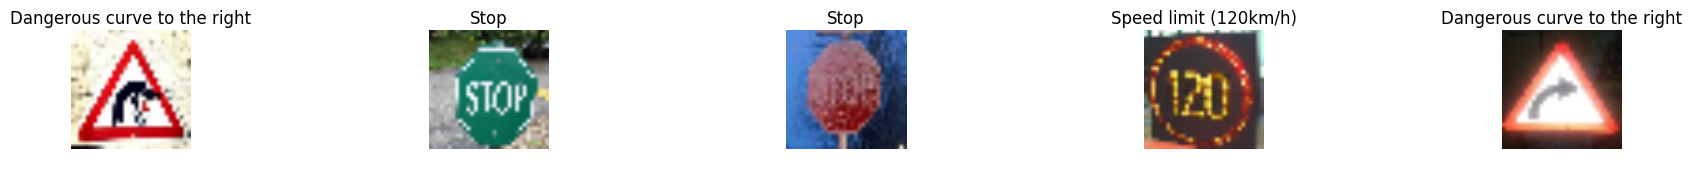

In [21]:
# We display the images with the correct labels
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=2)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(new_images[i])
    plt.axis('off')
    plt.title(sign_names[new_labels[i]])
        
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I chose the 5 images above because:
- the 1st image is a "dangerous curve to the right" sign that has been vandalized/improved and now represents a person picking up a flower. It is easy for a human to know what part is the original sign and what part has been added.
- the 2nd sign is simply a "STOP" sign but in the wrong color. The "STOP" signs are usually red but this one is green.
- the 3rd sign is also a "STOP" sign, but it is partially covered in snow.
- the 4th image is a "speed limit at 120km/h" sign. However, it is not a classic traffic sign, it is a luminous one. Moreover, the background color is black instead of white.
- the 5th image is a "dangerous curve to the right" sign, but it was taken by night and so the light makes the sign glary.


In [45]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
new_images_processed = [min_max_normalization(img) for img in new_images]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = tf.nn.softmax(logits)

    top_predictions = tf.nn.top_k(softmax, k=5)
    
    # We compute the top 5 probabilities and predictions for the new set of images
    proba, pred = sess.run(top_predictions,feed_dict={x:new_images_processed, y:new_labels})

new_predictions = [prediction[0] for prediction in pred]

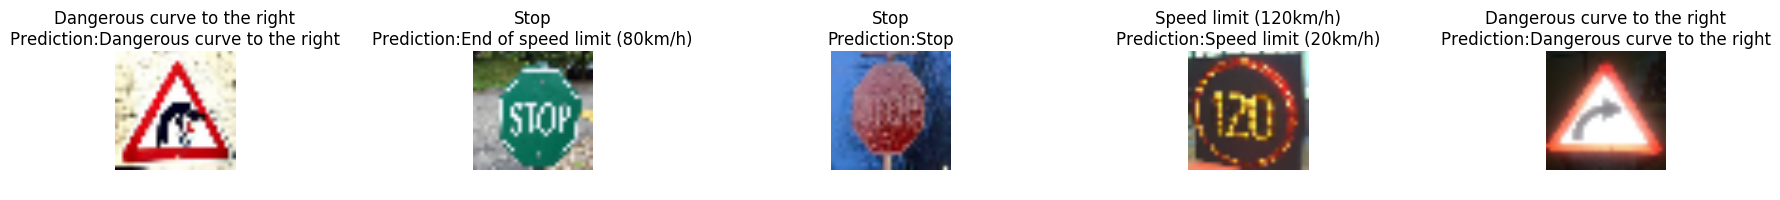

Accuracy on the new images = 0.600


In [50]:
# We display the predictions for the new set of images
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=2)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(new_images[i])
    plt.title(sign_names[new_labels[i]]+'\nPrediction:'+sign_names[new_predictions[i]])
    plt.axis('off')
        
plt.show()

new_accuracy = np.mean(np.array(new_predictions) == np.array(new_labels))
print("Accuracy on the new images = {:.3f}".format(new_accuracy))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model does not performs equally well on these new images: 3 out of 5 or 60% accuracy versur 94.8% on the test set.
I will analyze the results in details in the next question.

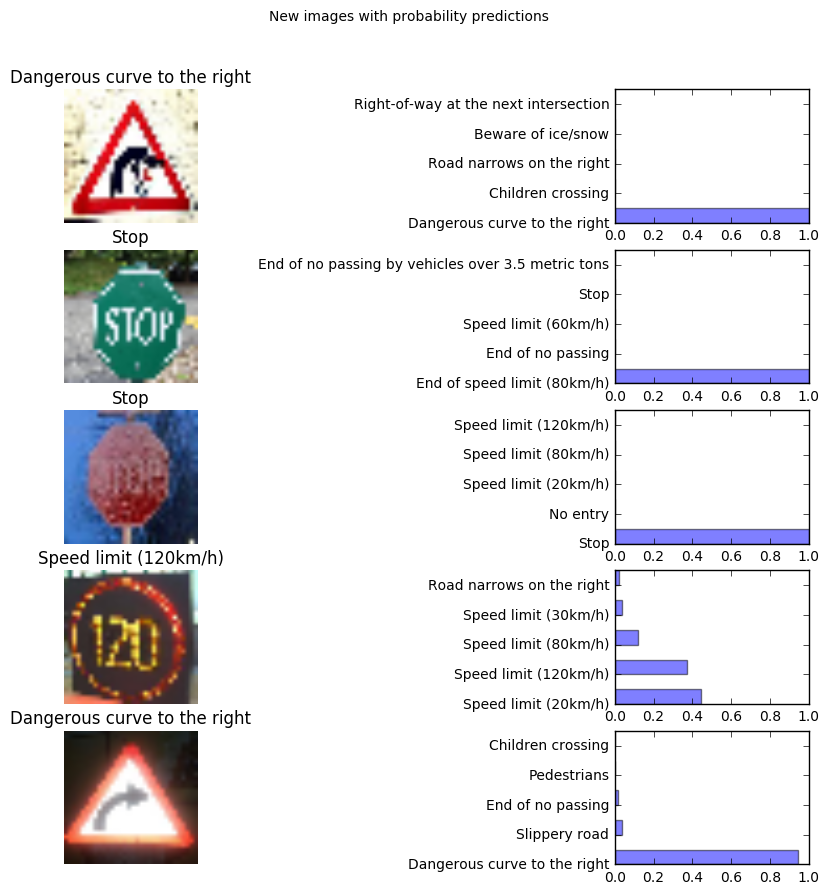

In [53]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
    
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=2)
for i in range(5):
    plt.subplot(5,2,2*i+1)
    plt.imshow(new_images[i])
    plt.axis('off')
    plt.title(sign_names[new_labels[i]])
    
    plt.subplot(5,2,2*i+2)
    class_id = np.arange(5)
    class_count = proba[i]
    plt.barh(class_id, class_count, alpha=0.5, height=0.5)
    plt.yticks(class_id, [sign_names[pred[i,j]] for j in range(5)])
    plt.xlim([0, 1])
    
plt.suptitle('New images with probability predictions')
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The first thing we notice is that the classifier recognized correctly the 2 "Dangerous curve to the right sign". Also, it is very sure for the 1st one (the vandalized one) but a little less sure for the glary one.

The classifier is also very sure of its guess for the 2 stops signs. Unfortunately, it correctly recognized only one:
1. It recognized correctly the red stop sign partially covered in snow
2. It misinterpreted the green stop sign for an "End of speed limit (80km/h)" sign.
3. For the green stop sign, "STOP" was only its 4th top guess. This means that the green color is really bothering for the classifier. Using 2 convolutionnal layers at the beginning of my architecture to "train a new color space" might have caused that.

Finally, my classifier is very unsure for the luminous "Speed limit (120km/h)" sign:
1. None of its guesses has a probability of 50% or more
2. The 4 top guesses are speed limit signs (20, 120, 80, 30 km/h). I am guessing it recognized the red circle and the 0 inside.
3. The 2 top guesses are speed limits at 20 and 120 km/h. I am guessing it also recognized the 2 inside the circle.
Unfortunately, its prediction was "Speed limit (20km/h)" instead of "Speed limit (120km/h)".


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.